In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv('labeled_data.csv')

In [33]:
data.head()

,EmployeeID,Age,Gender,MaritalStatus,Education,EducationField,Department,JobRole,JobLevel,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,1,1,1,0,0,0,1,131160,...,6,1,0,0,2,3,2,2,0,0
1,2,31,1,0,0,0,1,1,1,41890,...,3,5,1,4,2,1,3,1,1,1
2,3,32,0,1,3,1,1,2,4,193280,...,2,5,0,3,1,1,0,2,0,0
3,4,38,0,1,4,0,1,3,3,83210,...,5,8,7,5,3,3,1,1,0,0
4,5,32,0,0,0,2,1,2,1,23420,...,2,6,0,4,3,0,1,2,0,0


In [34]:
x = data.drop(['EmployeeID', 'Attrition'], axis = 1)
y = data['Attrition']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

# RFE

In [89]:
from sklearn.feature_selection import RFE

In [90]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(xtrain, ytrain)
selector.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [91]:
selector.ranking_

array([ 1, 22, 15, 13, 11, 21,  6, 17,  1, 19,  3,  4, 20,  7,  2, 10,  5,
       14,  9,  8, 12, 16, 18, 23])

# RFECV

In [92]:
from sklearn.feature_selection import RFECV

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(xtrain, ytrain)
selector.support_

array([ True, False, False, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False, False, False])

In [95]:
selector.ranking_

array([ 1, 13,  5,  3,  1, 12,  1,  8,  1, 11,  1,  1, 10,  1,  1,  4,  1,
        6,  1,  1,  2,  7,  9, 14])

# Feature Importance

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
model = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 101), algorithm='SAMME', random_state = 101)
model.fit(xtrain, ytrain)
# make predictions for test data and evaluate
predictions = model.predict(xtest)
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.75%


In [71]:
model = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 101), algorithm='SAMME', random_state = 101)
model.fit(xtrain, ytrain)
print(np.sort(model.feature_importances_))

[0.00940618 0.0141627  0.0204411  0.0263415  0.02848804 0.02871731
 0.02922948 0.03028373 0.03244834 0.0342275  0.03500842 0.03602188
 0.03643926 0.03765832 0.04187871 0.04205882 0.04232492 0.04735264
 0.05608373 0.05838357 0.06660503 0.07513414 0.08220497 0.0890997 ]


In [72]:
feature = pd.DataFrame()
feature['kolom'] = x.columns
feature['importances'] = model.feature_importances_

<Figure size 1080x1080 with 0 Axes>

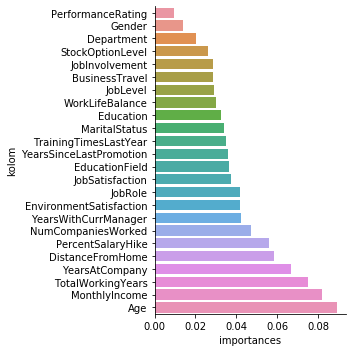

In [73]:
plt.figure(figsize=(15,15))
sns.catplot(y = 'kolom', x = 'importances', data = feature.sort_values(by = 'importances'), kind= 'bar')
plt.tight_layout()

In [74]:
from sklearn.feature_selection import SelectFromModel

In [75]:
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_xtrain = selection.transform(xtrain)
    # train model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_xtrain, ytrain)
    # eval model
    select_xtest = selection.transform(xtest)
    predictions = selection_model.predict(select_xtest)
    accuracy = accuracy_score(ytest, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_xtrain.shape[1], accuracy*100.0))

Thresh=0.009, n=24, Accuracy: 98.14%
Thresh=0.014, n=23, Accuracy: 97.98%
Thresh=0.020, n=22, Accuracy: 98.22%
Thresh=0.026, n=21, Accuracy: 98.06%
Thresh=0.028, n=20, Accuracy: 97.60%
Thresh=0.029, n=19, Accuracy: 98.37%
Thresh=0.029, n=18, Accuracy: 97.83%
Thresh=0.030, n=17, Accuracy: 97.98%
Thresh=0.032, n=16, Accuracy: 97.98%
Thresh=0.034, n=15, Accuracy: 97.98%
Thresh=0.035, n=14, Accuracy: 97.60%
Thresh=0.036, n=13, Accuracy: 97.83%
Thresh=0.036, n=12, Accuracy: 97.83%
Thresh=0.038, n=11, Accuracy: 97.83%
Thresh=0.042, n=10, Accuracy: 97.98%
Thresh=0.042, n=9, Accuracy: 97.75%
Thresh=0.042, n=8, Accuracy: 97.52%
Thresh=0.047, n=7, Accuracy: 97.75%
Thresh=0.056, n=6, Accuracy: 97.52%
Thresh=0.058, n=5, Accuracy: 97.52%
Thresh=0.067, n=4, Accuracy: 97.52%
Thresh=0.075, n=3, Accuracy: 97.60%
Thresh=0.082, n=2, Accuracy: 97.83%
Thresh=0.089, n=1, Accuracy: 83.10%


In [84]:
model = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 101), algorithm='SAMME', random_state = 101)
model.fit(xtrain[['Age','MonthlyIncome']], ytrain)
# make predictions for test data and evaluate
predictions = model.predict(xtest[['Age','MonthlyIncome']])
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.83%


In [88]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1071
           1       0.97      0.90      0.93       219

    accuracy                           0.98      1290
   macro avg       0.98      0.95      0.96      1290
weighted avg       0.98      0.98      0.98      1290

